In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.externals import joblib

In [3]:
dataset_train  = pd.read_csv('datasets/AppleCompanyStock.csv')
training_set = dataset_train.iloc[16:, 2:3].values
test_set = dataset_train.iloc[:16, 2:3].values

dataset_train.head(3)

,year,month,open,high,low,close,volume
0,2018,3,177.32,177.47,173.66,175.82,46812368
1,2018,3,180.29,183.50,177.62,178.02,151720299
2,2018,3,175.21,180.00,174.27,179.98,138442235


In [49]:
len(training_set)

934

In [12]:
print(training_set[:5], training_set[929:])

[[175.05 ]
 [170.29 ]
 [173.5  ]
 [172.365]
 [163.89 ]] [[108.  ]
 [101.  ]
 [108.44]
 [101.  ]
 [102.  ]]


In [19]:
len(test_set)

16

In [50]:
dataset_train.shape

(950, 7)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))


In [14]:
training_set_scaled = sc.fit_transform(training_set)

In [15]:
print(training_set_scaled[:1], training_set_scaled[929:])

[[0.23595931]] [[0.13825012]
 [0.12804931]
 [0.13889132]
 [0.12804931]
 [0.12950657]]


In [20]:
X_train = []
y_train = []

data_length = 5
for i in range(data_length, len(training_set)):
    X_train.append(training_set_scaled[i-data_length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
    
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
print(X_train[0].tolist())

[[0.2359593133397453], [0.22902276237941185], [0.23370056250182158], [0.23204657398501938], [0.21969630730669462]]


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [26]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer ='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size = 16)

Epoch 1/200
929/929 [==============================] - 18s 19ms/step - loss: 0.0584
Epoch 2/200
929/929 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 3/200
929/929 [==============================] - 1s 964us/step - loss: 0.0050
Epoch 4/200
929/929 [==============================] - 1s 824us/step - loss: 0.0046
Epoch 5/200
929/929 [==============================] - 1s 572us/step - loss: 0.0043
Epoch 6/200
929/929 [==============================] - 1s 706us/step - loss: 0.0046
Epoch 7/200
929/929 [==============================] - 1s 690us/step - loss: 0.0041
Epoch 8/200
929/929 [==============================] - 1s 656us/step - loss: 0.0048
Epoch 9/200
929/929 [==============================] - 1s 622us/step - loss: 0.0042
Epoch 10/200
929/929 [==============================] - 1s 698us/step - loss: 0.0044
Epoch 11/200
929/929 [==============================] - 1s 775us/step - loss: 0.0040
Epoch 12/200
929/929 [==============================] - 1s 624us/step - loss

929/929 [==============================] - 0s 488us/step - loss: 0.0018
Epoch 98/200
929/929 [==============================] - 0s 488us/step - loss: 0.0017
Epoch 99/200
929/929 [==============================] - 0s 488us/step - loss: 0.0024
Epoch 100/200
929/929 [==============================] - 0s 488us/step - loss: 0.0019
Epoch 101/200
929/929 [==============================] - 0s 505us/step - loss: 0.0019
Epoch 102/200
929/929 [==============================] - 0s 488us/step - loss: 0.0019
Epoch 103/200
929/929 [==============================] - 0s 505us/step - loss: 0.0019
Epoch 104/200
929/929 [==============================] - 0s 505us/step - loss: 0.0017
Epoch 105/200
929/929 [==============================] - 0s 488us/step - loss: 0.0017
Epoch 106/200
929/929 [==============================] - 0s 488us/step - loss: 0.0017
Epoch 107/200
929/929 [==============================] - 0s 505us/step - loss: 0.0017
Epoch 108/200
929/929 [==============================] - 0s 488us/step

929/929 [==============================] - 1s 538us/step - loss: 0.0017
Epoch 193/200
929/929 [==============================] - 1s 572us/step - loss: 0.0016
Epoch 194/200
929/929 [==============================] - 1s 538us/step - loss: 0.0016
Epoch 195/200
929/929 [==============================] - 1s 538us/step - loss: 0.0014
Epoch 196/200
929/929 [==============================] - 1s 555us/step - loss: 0.0016
Epoch 197/200
929/929 [==============================] - 1s 538us/step - loss: 0.0016
Epoch 198/200
929/929 [==============================] - 1s 555us/step - loss: 0.0016
Epoch 199/200
929/929 [==============================] - 1s 538us/step - loss: 0.0016
Epoch 200/200
929/929 [==============================] - 1s 538us/step - loss: 0.0015


In [117]:

joblib.dump(regressor, 'regressor_apple.pkl')

['regressor_apple.pkl']

In [103]:
len(training_set)

934

In [104]:
len(test_set)

16

In [7]:
dataset_total = pd.concat((pd.DataFrame(training_set), pd.DataFrame(test_set)), axis=0)
inputs = dataset_total[len(dataset_train)-len(test_set)-data_length:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

dataset_total.shape

(950, 1)

In [8]:
regressor = joblib.load('regressor_apple.pkl')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [9]:
X_test = []
y_test = []

for i in range(data_length, data_length+len(test_set)):
    X_test.append(inputs[i-data_length:i, 0])
    y_test.append(inputs[i, 0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(y_test)


In [115]:
print(predicted_stock_price[3])
print(real_stock_price[3])

[173.49579]
[176.35]


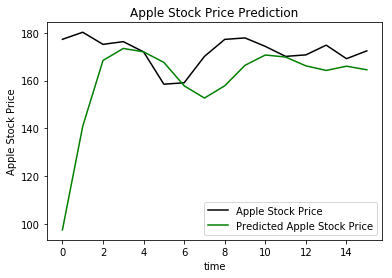

In [10]:
plt.plot(real_stock_price, color ='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='green', label = 'Predicted Apple Stock Price')
plt.title("Apple Stock Price Prediction")
plt.xlabel('time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()